<Figure size 1000x700 with 0 Axes>

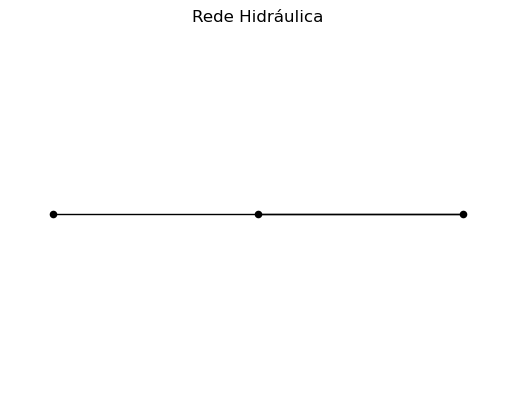

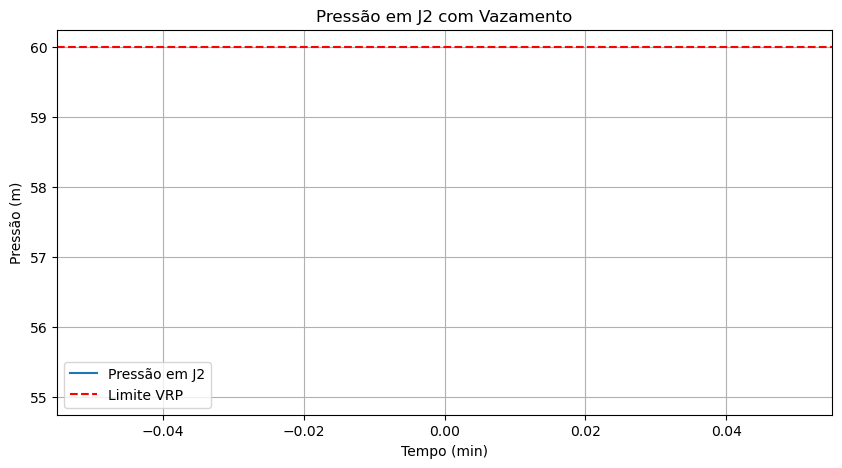

In [14]:
import wntr
import matplotlib.pyplot as plt
import numpy as np

# 1. Crie uma rede simples
wn = wntr.network.WaterNetworkModel()

# Adicione reservatório, tubulações e nós
wn.add_reservoir('R1', base_head=100, coordinates=(0,0))
wn.add_junction('J1', base_demand=0.01, elevation=50, coordinates=(500,0))
wn.add_junction('J2', base_demand=0.01, elevation=45, coordinates=(1000,0))
wn.add_pipe('P1', 'R1', 'J1', length=500, diameter=300, roughness=100)
wn.add_pipe('P2', 'J1', 'J2', length=500, diameter=300, roughness=100)

# 2. Adicione uma VRP entre J1 e J2
wn.add_valve(
    name='VRP1',
    start_node_name='J1',
    end_node_name='J2',
    diameter=300,
    valve_type='PRV',        # Tipo da válvula: PRV (Pressure Reducing Valve)
    minor_loss=0.0,          # Pode ajustar conforme necessário
    initial_setting=60,      # Pressão de ajuste (em metros)
    initial_status='ACTIVE'  # Status inicial (pode ser 'OPEN', 'CLOSED' ou 'ACTIVE')
)  # Limite de pressão = 60 m

# Plota a estrutura da rede
fig = plt.figure(figsize=(10,7))
wntr.graphics.plot_network(wn, title='Rede Hidráulica', node_size=30)
plt.show()
# 3. Simule um vazamento em J2 (aumentando a demanda)
wn.get_node('J2').demand_timeseries_list[0].base_value = 0.05  # CERTO
 # Simulando vazamento

# 4. Simule hidráulica
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

# 5. Extraia e plote a pressão em J2
pressure = results.node['pressure'].loc[:, 'J2']

plt.figure(figsize=(10,5))
plt.plot(pressure, label='Pressão em J2')
plt.axhline(60, color='r', linestyle='--', label='Limite VRP')
plt.title('Pressão em J2 com Vazamento')
plt.xlabel('Tempo (min)')
plt.ylabel('Pressão (m)')
plt.legend()
plt.grid()
plt.show()

In [36]:
import wntr

# Create a water network model
inp_file = 'PK_QD28_TESTE_DOS_NOS_DUPLICADOS (20.inp'
wn = wntr.network.WaterNetworkModel(inp_file)


<Figure size 1000x700 with 0 Axes>

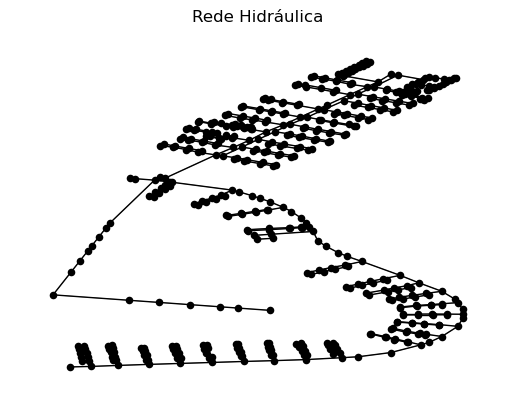

In [37]:
import matplotlib.pyplot as plt
import wntr

fig = plt.figure(figsize=(10,7))
wntr.graphics.plot_network(
    wn, 
    title='Rede Hidráulica', 
    node_size=30, 
    node_labels=False  # Mostra os nomes dos nós
)
plt.show()


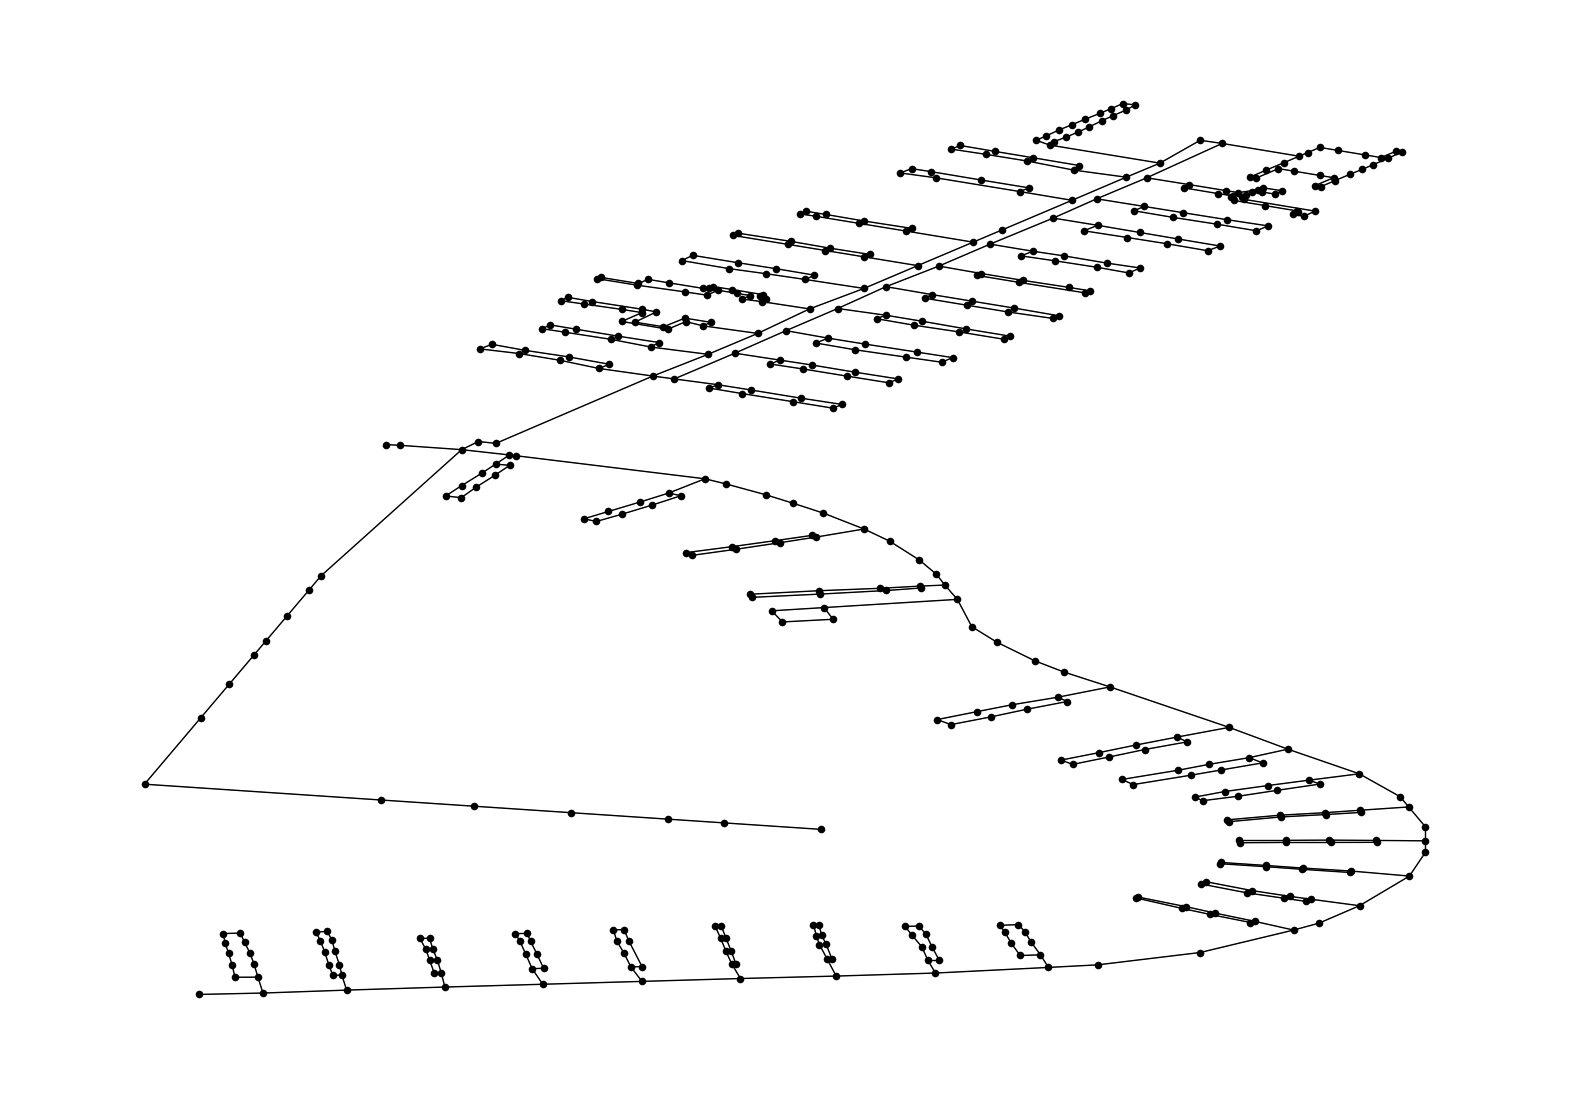

KeyError: 'N1'

In [38]:
import matplotlib.pyplot as plt
import wntr

highlight_node = 'N1'  # Substitua pelo nome do nó que deseja destacar

fig, ax = plt.subplots(figsize=(20,14))
# Plota todos os nós normalmente
wntr.graphics.plot_network(wn, ax=ax, node_size=30)

# Destaca o nó escolhido em vermelho
x, y = wn.get_node(highlight_node).coordinates
ax.scatter(x, y, s=200, color='red', zorder=5, label=f'Nó {highlight_node} em destaque')

# Adiciona os nomes dos nós com deslocamento
for node_name, node in wn.nodes():
    x, y = node.coordinates
    color = 'red' if node_name == highlight_node else 'black'
    ax.text(x + 10, y + 10, node_name, fontsize=10, color=color)

plt.title(f'Rede Hidráulica com o nó {highlight_node} destacado')
plt.legend()
plt.show()


In [23]:
print("Nós:", wn.node_name_list)
print("Tubulações:", wn.pipe_name_list)
print("Reservatórios:", wn.reservoir_name_list)
print("Bombas:", wn.pump_name_list)
print("Válvulas:", wn.valve_name_list)


Nós: ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N34', 'N35', 'N36', 'N37', 'N38', 'N39', 'N40']
Tubulações: ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39']
Reservatórios: []
Bombas: []
Válvulas: []


In [12]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

# Pressão no nó J1 ao longo do tempo
pressure = results.node['pressure']['J1']
pressure.plot(title='Pressão no nó J1')
plt.xlabel('Tempo (min)')
plt.ylabel('Pressão (m)')
plt.show()


EpanetException: (Error 224) no tanks or reservoirs in network